# 1 - Check images in directory

- this is responsible for checking all images in one directory by viewing whether there box around images or not using one directory 
- it will do nothing with the data but it helpful for us to count the number of useful images and check them

In [1]:
import numpy as np
import cv2 
import os
import mediapipe as mp
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import time
import pandas as pd

2022-03-14 17:00:48.052253: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mina/.local/lib/python3.8/site-packages/cv2/../../lib64:
2022-03-14 17:00:48.052275: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [ ]:
dir_path = os.path.join("..","..","data","data_letter_khaa")
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils
holistic = mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

In [2]:
def mediapipe_detection(image,model):
    image  = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image  = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    return image,results


    
def draw_styled_landmarks(image,results):
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 
    


def diff(pose,hand):
    pose_x,pose_y = pose[0].x,pose[0].y
    hand_x,hand_y = hand[0].x,hand[0].y
    
    return abs(pose_y-hand_y)
    #return abs(pose_x-hand_x) + abs(pose_y-hand_y)

    
    
def draw_rect(frame,lis):
    min_x = 1000000
    max_x=0
    min_y=1000000
    max_y=0
    
    for point in lis:
        landmark_px = mp_drawing._normalized_to_pixel_coordinates(point.x, point.y,
                                                   frame.shape[1], frame.shape[0])
        

        
        if landmark_px:

            min_x = min(landmark_px[0],min_x)
            min_y = min(landmark_px[1],min_y)
            max_x = max(landmark_px[0],max_x)
            max_y = max(landmark_px[1],max_y)
        else:
            return False
    
    
    
    Shift_X = frame.shape[1]//50
    Shift_Y = frame.shape[0]//50
    
    min_x = max(0,min_x-Shift_X)
    min_y = max(0,min_y-Shift_Y)
    max_x = min(frame.shape[0],max_x+Shift_X)
    max_y = min(frame.shape[1],max_y+Shift_Y)
    
    cv2.rectangle(frame,(min_x,min_y),(max_x,max_y),(255,0,0),10)

    return True

    

        

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


image num 0
image num 1
image num 2
image num 3
image num 4
image num 5
image num 6
image num 7
image num 8
image num 9
image num 10
image num 11
image num 12
image num 13
image num 14
image num 15
image num 16
image num 17
image num 18
image num 19
image num 20
image num 21
image num 22
image num 23
image num 24
image num 25
image num 26
image num 27
image num 28
image num 29
image num 30
image num 31
image num 32
image num 33
image num 34
image num 35
image num 36
image num 37
image num 38
image num 39
image num 40
image num 41
image num 42
image num 43
image num 44
image num 45
image num 46
image num 47
image num 48
image num 49
image num 50
image num 51
image num 52
image num 53
image num 54
image num 55
image num 56
image num 57
image num 58
image num 59
image num 60
image num 61
image num 62
image num 63
image num 64
image num 65
image num 66
image num 67
image num 68
image num 69
image num 70
image num 71
image num 72
image num 73
image num 74


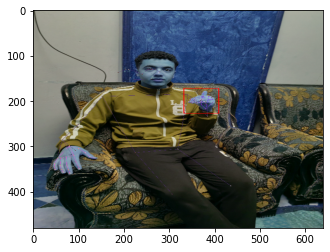

In [64]:
images = os.listdir(dir_path)

right_hand = []
left_hand = []
both_hands = []
non_hands = []


def add_left(frame,keypoints):
    condition = draw_rect(frame,keypoints.left_hand_landmarks.landmark)
    if condition:
        left_hand.append(frame)
    else:
        non_hands.append(frame)

def add_right(frame,keypoints):
    condition = draw_rect(frame,keypoints.right_hand_landmarks.landmark)
    if condition:
        right_hand.append(frame)
    else:
        non_hands.append(frame)
    


for i,image in enumerate(images):
    print("image num",i)
    
    frame = cv2.imread(os.path.join(dir_path,image))
    

    # frame  = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)


    frame,results = mediapipe_detection(frame,holistic)

    draw_styled_landmarks(frame,results)
    
    valid_left =  results.left_hand_landmarks
    valid_right = results.right_hand_landmarks
    
    if valid_right and valid_left:
        left_diff = diff(results.pose_landmarks.landmark,results.left_hand_landmarks.landmark)
        right_diff = diff(results.pose_landmarks.landmark,results.right_hand_landmarks.landmark)
        if left_diff < right_diff:
            add_left(frame,results)
        else:
            add_right(frame,results)
    elif valid_right:
        add_right(frame,results)
    elif valid_left:
        add_left(frame,results)
    else:
        non_hands.append(frame)
    
    
        


    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
    frame = cv2.resize(frame, (640, 480)) 
    cv2.imshow("frame",frame)


plt.imshow(frame)
cv2.destroyAllWindows()

    

In [55]:
cv2.destroyAllWindows()

In [74]:
len(right_hand),len(left_hand),len(non_hands),len(left_hand) + len(right_hand) + len(non_hands)

(34, 35, 6, 75)

In [ ]:
for frame in right_hand:
    
    if cv2.waitKey(500) & 0xFF == ord('q'):
        break
    
    frame = cv2.resize(frame, (640, 480)) 
    cv2.imshow("frame",frame)

cv2.destroyAllWindows()


In [70]:
for frame in left_hand:
    
    if cv2.waitKey(500) & 0xFF == ord('q'):
        break
    
    frame = cv2.resize(frame, (640, 480)) 
    cv2.imshow("frame",frame)

cv2.destroyAllWindows()


In [72]:
for frame in non_hands:
    
    if cv2.waitKey(500) & 0xFF == ord('q'):
        break
    
    frame = cv2.resize(frame, (640, 480)) 
    cv2.imshow("frame",frame)

cv2.destroyAllWindows()


# 2 - get keypoints from Directory

- it does exactly as the name suggests

In [121]:
import numpy as np
import cv2 
import os
import mediapipe as mp
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import time
import pandas as pd

In [122]:
def mediapipe_detection(image,model):
    image  = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image  = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    return image,results

        
    
def extract_keypoints(results,status='l'):
    if status == 'l':
        return np.array([ [res.x,res.y] for res in results.left_hand_landmarks.landmark ]).flatten()
    else:
        return np.array([ [res.x,res.y] for res in results.right_hand_landmarks.landmark ]).flatten()
    
                

def diff(pose,hand):
    pose_x,pose_y = pose[0].x,pose[0].y
    hand_x,hand_y = hand[0].x,hand[0].y
    
    return abs(pose_y-hand_y)
    #return abs(pose_x-hand_x) + abs(pose_y-hand_y)


    
def validate_hand(frame,lis):
    
    for point in lis:
        landmark_px = mp_drawing._normalized_to_pixel_coordinates(point.x, point.y,
                                                   frame.shape[1], frame.shape[0])
        if not landmark_px:
            return False


    return True

    
def add_left(data,frames,frame,results):
    condition = validate_hand(frame,results.left_hand_landmarks.landmark)
    if condition:
        data.append(extract_keypoints(results,'l'))
        frames.append(frame)
        
        

def add_right(data,frames,frame,results):
    condition = validate_hand(frame,results.right_hand_landmarks.landmark)
    if condition:
        data.append(extract_keypoints(results,'r'))
        frames.append(frame)
    

        


In [123]:
def get_key_points(images):

    data = []
    frames = []

    for i,image in enumerate(images):
        print("image num",i)

        frame = cv2.imread(os.path.join(dir_path,image))


        frame,results = mediapipe_detection(frame,holistic)


        valid_left =  results.left_hand_landmarks
        valid_right = results.right_hand_landmarks

        if valid_right and valid_left:
            left_diff = diff(results.pose_landmarks.landmark,results.left_hand_landmarks.landmark)
            right_diff = diff(results.pose_landmarks.landmark,results.right_hand_landmarks.landmark)
            if left_diff < right_diff:
                add_left(data,frames,frame,results)
            else:
                add_right(data,frames,frame,results)
        elif valid_right:
            add_right(data,frames,frame,results)
        elif valid_left:
            add_left(data,frames,frame,results)




        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

        frame = cv2.resize(frame, (640, 480)) 
        cv2.imshow("frame",frame)

    cv2.destroyAllWindows()
    
    return data,frames

    

In [124]:
dir_path = os.path.join("..","..","data","data_letter_khaa")
images = os.listdir(dir_path)

data,frames = get_key_points(images)

image num 0
image num 1
image num 2
image num 3
image num 4
image num 5
image num 6
image num 7
image num 8
image num 9
image num 10
image num 11
image num 12
image num 13
image num 14
image num 15
image num 16
image num 17
image num 18
image num 19
image num 20
image num 21
image num 22
image num 23
image num 24
image num 25
image num 26
image num 27
image num 28
image num 29
image num 30
image num 31
image num 32
image num 33
image num 34
image num 35
image num 36
image num 37
image num 38
image num 39
image num 40
image num 41
image num 42
image num 43
image num 44
image num 45
image num 46
image num 47
image num 48
image num 49
image num 50
image num 51
image num 52
image num 53
image num 54
image num 55
image num 56
image num 57
image num 58
image num 59
image num 60
image num 61
image num 62
image num 63
image num 64
image num 65
image num 66
image num 67
image num 68
image num 69
image num 70
image num 71
image num 72
image num 73
image num 74


In [125]:
len(data),len(frames)

(72, 72)

# 3 - Test the keypoints from images

- after we got the keypoints from the frame if we are feeling that those keypoints might be wrong we can use the below code to draw the extracted keypoints with the frames

In [126]:
def draw_landmark_from_array(image,keyPoints):
    image_rows, image_cols, _ = image.shape
    
    
    for i in range(len(keyPoints)//2):
        x = keyPoints[i*2]
        y = keyPoints[i*2+1]
        if(x!=0 and y!=0): 
            landmark_px = mp_drawing._normalized_to_pixel_coordinates(x,y,
                                                       image_cols, image_rows)
            cv2.circle(image, landmark_px, 2, (0,0,255),
                     30)

                


In [127]:
for i in range(len(data)):
    
    print(f"image num {i}")
    image = frames[i]
    keypoint = data[i]

    draw_landmark_from_array(image,keypoint)

    image = cv2.resize(image, (640, 480)) 
    cv2.imshow("frame",image)
    if cv2.waitKey(500) & 0xFF == ord('q'):
        break


cv2.destroyAllWindows()

image num 0
image num 1
image num 2
image num 3
image num 4
image num 5
image num 6
image num 7
image num 8
image num 9
image num 10
image num 11
image num 12
image num 13
image num 14
image num 15
image num 16
image num 17
image num 18
image num 19
image num 20
image num 21
image num 22
image num 23
image num 24
image num 25
image num 26
image num 27
image num 28
image num 29
image num 30
image num 31
